## Spotify top songs 2010-2019 exploratory data analysis

Welcome to my notebook. Here I've used a dataset from Kaggle containing data of the top 50 songs per year from Spotify between 2010-2019. I perform some exploratory data analysis to identify key trends in the dataset.

### Contents

##### 1. Analysing data quality
##### 2. Descriptive statistics, focussing on the artists that had the most songs and the most common genres.
##### 3. Summary statitics, focussing on mean values of top genres and correlation matrices between song variables. 
##### 4. Is the popularity of a song driven by any particular variable? We use visualisations and linear regressions to assess this.
##### 5. Do the distributions of song variables change over time? We used ECDF plots (Empirical Cumulative Distribution Plots) to investigate this.

#### Enjoy :)


In [1020]:
# install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy.stats import linregress

In [1181]:
# set universal parameters
plt.rcParams.update({'font.size': 5})  # setting global font size which applies to all axes
plt.style.use('default') 
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1500)
figsize = (14,20)

In [1232]:
# import data into a DataFrame
data = pd.read_csv('spotify_data.csv', encoding='ISO-8859-1')
data.head()
data.rename(columns={'top genre':'genre','nrgy':'energy','dnce':'danceability','dB':'loudness','live':'liveness','val':'valence','dur':'duration','acous':'acoustic','spch':'speech','pop':'popularity'}, inplace=True)
data = data.drop(labels='Unnamed: 0', axis=1)

#### Let's check the quality of the dataset:

In [1123]:
#  DQ checks and data cleanse
data.info()
nulls = data.isnull().sum()
dupes = data.duplicated().sum()

print(f'There are ' + str(nulls.sum()) + ' null values and ' + str(dupes) + ' duplicated rows in the dataset.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         603 non-null    object
 1   artist        603 non-null    object
 2   genre         603 non-null    object
 3   year          603 non-null    int64 
 4   bpm           603 non-null    int64 
 5   energy        603 non-null    int64 
 6   danceability  603 non-null    int64 
 7   loudness      603 non-null    int64 
 8   liveness      603 non-null    int64 
 9   valence       603 non-null    int64 
 10  duration      603 non-null    int64 
 11  acoustic      603 non-null    int64 
 12  speech        603 non-null    int64 
 13  popularity    603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 66.1+ KB
There are 0 null values and 0 duplicated rows in the dataset.
Upon inspection, all fields have appropriate data types.


There are 0 null values in the dataset, so we do not need to inplace or drop these when conducting statistical analyses later on.
Upon inspection, all fields have appropriate data types so these do not need to be converted.

#### Let's look at some descriptive statistics:

['Bruno Mars' 'Justin Bieber']
There are 16 records by 14 different artists that had top songs across multiple years.
The following artists had more than one song that spanned two years in the top 50: ['Bruno Mars' 'Justin Bieber']


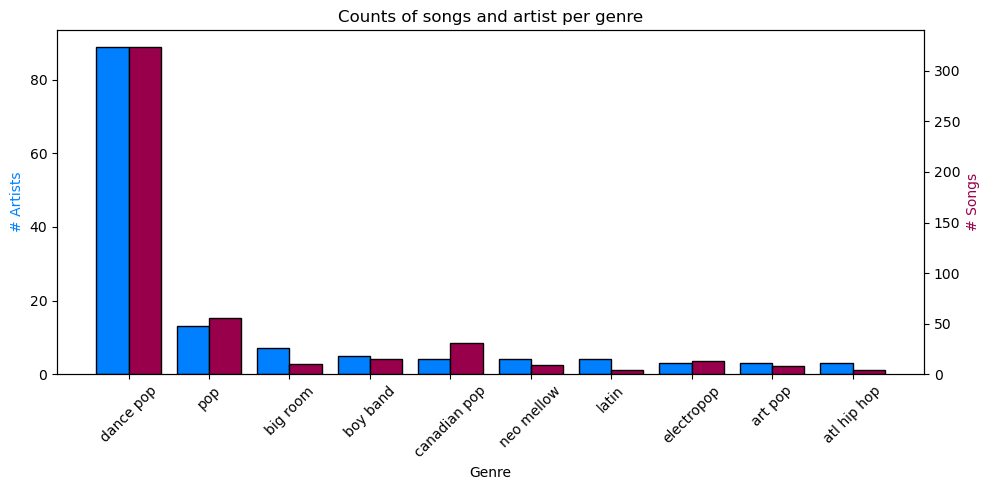

In [1276]:
#  Descriptive stats
data['multiyear_songs'] = data.duplicated(['title','artist'])
multiyear_songs = data[data['multiyear_songs'] == True]
top_artists = multiyear_songs[['artist']].value_counts().reset_index()
top_artists = top_artists[top_artists[0] > 1]
top_artists = top_artists['artist'].reset_index(drop=True)

print(f'There are ' + str(len(multiyear_songs)) + ' records by ' + str(multiyear_songs['artist'].nunique()) + ' different artists that had top songs across multiple years.')
print(f'The following artists had more than one song that spanned two years in the top 50: ' + str(top_artists.unique()))

#  create grouped bar graph showing total number of artists and songs per genre
fig, ax = plt.subplots(figsize = (10, 5))
width = 0.4
x = np.arange(len(top_genres)) #  enurating the x axis to enable plotting 2 bars per genre (by plotting slightly aside (0.2) of each central x axis point - see https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
ax2 = ax.twinx() # create another axis object
ax.bar(x-0.2, top_genres['artist'], color = '#0080FF', width=width, edgecolor='k', label='Artist')
ax2.bar(x+0.2, top_genres['title'], color = '#99004C', width=width, edgecolor='k', label='Title')
ax.set_xlabel('Genre')
ticks_loc = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels(ax.get_xticks(), rotation = 45)
plt.xticks(x, top_genres.index) #  replacing x axis labels with original list of genres
ax.set_ylabel('# Artists', color = '#0080FF')
ax2.set_ylabel('# Songs', color = '#99004C')
plt.title('Counts of songs and artist per genre')
plt.tight_layout()
plt.show()

In [1277]:
#  creating list of genres with total number of artists/songs and mean stats for song variables.
data.columns
columns = ['popularity','bpm', 'energy', 'danceability', 'loudness', 'liveness', 'valence', 'duration', 'acoustic', 'speech']
top_genres = data.groupby('genre')[['artist', 'title']].nunique().sort_values(by=['artist','title'], ascending=False).head(10) #  selecting top 10 genres according to number of artists and songs with the genre
genre_variables = data.groupby('genre')[columns].median()
genre_enriched = top_genres.merge(genre_variables, on='genre', how='inner') #  dataframe containing median variables for each top 10 genre
genre_enriched.style.highlight_max(axis=0) #  table with conditional formatting to visualise variables more easily
genre_enriched.style.background_gradient(cmap="Blues")

,artist,title,popularity,bpm,energy,danceability,loudness,liveness,valence,duration,acoustic,speech
genre,,,,,,,,,,,,
dance pop,89,324,67.000000,120.000000,75.000000,67.000000,-5.000000,13.000000,57.000000,220.000000,5.000000,6.000000
pop,13,56,75.500000,117.000000,70.500000,70.000000,-6.000000,10.500000,55.000000,223.500000,9.500000,5.000000
big room,7,10,77.000000,125.000000,78.000000,61.000000,-5.000000,11.500000,44.500000,211.500000,6.000000,5.000000
boy band,5,15,72.000000,120.000000,82.000000,65.000000,-4.000000,12.000000,52.000000,200.000000,3.000000,6.000000
canadian pop,4,31,72.000000,118.000000,74.000000,62.000000,-6.000000,13.000000,56.000000,207.000000,5.500000,6.000000
neo mellow,4,9,56.000000,116.000000,34.000000,52.000000,-9.000000,9.000000,26.000000,229.000000,84.000000,3.000000
latin,4,4,72.000000,141.500000,81.500000,72.000000,-3.500000,16.500000,65.000000,217.500000,13.000000,7.500000
electropop,3,13,76.000000,103.000000,64.000000,65.000000,-7.000000,13.000000,45.000000,213.000000,10.000000,4.000000
art pop,3,8,62.500000,108.500000,57.500000,52.000000,-8.000000,13.000000,18.500000,257.000000,33.000000,6.000000


From the above visualisations, we can see that the genres 'dance pop' and 'pop' are the most common with the greatest number of artists and songs that fall within those genres. Conversely, other genres have a higher average popularity score such as 'big room' and 'electropop', suggesting songs within these genres have a little something extra that increases their popularity. 

#### Let's look at some summary statistics next.

In [1278]:
# Summary stats
print(data.describe())
corr = data.corr() #  correlation matrix between song variables
corr.style.background_gradient(cmap = 'Blues')

              year         bpm      energy  danceability    loudness    liveness     valence    duration    acoustic      speech  popularity
count   603.000000  603.000000  603.000000    603.000000  603.000000  603.000000  603.000000  603.000000  603.000000  603.000000  603.000000
mean   2014.592040  118.545605   70.504146     64.379768   -5.578773   17.774461   52.225539  224.674959   14.326700    8.358209   66.520730
std       2.607057   24.795358   16.310664     13.378718    2.798020   13.102543   22.513020   34.130059   20.766165    7.483162   14.517746
min    2010.000000    0.000000    0.000000      0.000000  -60.000000    0.000000    0.000000  134.000000    0.000000    0.000000    0.000000
25%    2013.000000  100.000000   61.000000     57.000000   -6.000000    9.000000   35.000000  202.000000    2.000000    4.000000   60.000000
50%    2015.000000  120.000000   74.000000     66.000000   -5.000000   12.000000   52.000000  221.000000    6.000000    5.000000   69.000000
75%    2017.0

,year,bpm,energy,danceability,loudness,liveness,valence,duration,acoustic,speech,popularity,multiyear_songs
year,1.000000,-0.104247,-0.225596,0.079269,-0.126471,-0.136331,-0.122025,-0.215344,0.101725,0.004778,0.241261,0.006050
bpm,-0.104247,1.000000,0.126170,-0.131301,0.183870,0.081579,0.016021,-0.029359,-0.113257,0.058999,0.018983,-0.027793
energy,-0.225596,0.126170,1.000000,0.167209,0.537528,0.186738,0.409577,-0.143610,-0.562287,0.107313,-0.057645,0.003757
danceability,0.079269,-0.131301,0.167209,1.000000,0.233170,-0.028801,0.501696,-0.176841,-0.240064,-0.028041,0.116054,-0.045602
loudness,-0.126471,0.183870,0.537528,0.233170,1.000000,0.081934,0.282922,-0.104723,-0.190401,-0.001110,0.156897,-0.021184
liveness,-0.136331,0.081579,0.186738,-0.028801,0.081934,1.000000,0.020226,0.098339,-0.098167,0.144103,-0.075749,-0.036565
valence,-0.122025,0.016021,0.409577,0.501696,0.282922,0.020226,1.000000,-0.262256,-0.249038,0.122013,0.038953,-0.000279
duration,-0.215344,-0.029359,-0.143610,-0.176841,-0.104723,0.098339,-0.262256,1.000000,0.091802,0.054564,-0.104363,0.013677
acoustic,0.101725,-0.113257,-0.562287,-0.240064,-0.190401,-0.098167,-0.249038,0.091802,1.000000,0.002763,0.026704,0.027239
speech,0.004778,0.058999,0.107313,-0.028041,-0.001110,0.144103,0.122013,0.054564,0.002763,1.000000,-0.041490,0.066613


#### Investigating these summary statistics has posed the following questions:

##### 1. Which factors influence a song's popularity?
Looking at the above correlations against popularity, there does not appear to be any high correlations with other variables. Since correlation only measures linear relationships, it's best to plot and visualise these to assess if another measure can be used to assess any relationship between variables. 
##### 2. Has this relationship changed over time?
This dataset spans 10 years. Has the relationship between popularity and other variables changed over that time frame?
##### 3. Which factors lead to greater danceability? Higher bpm/loudness/valence?

These can be investigated through visualisations and statistical analysis.

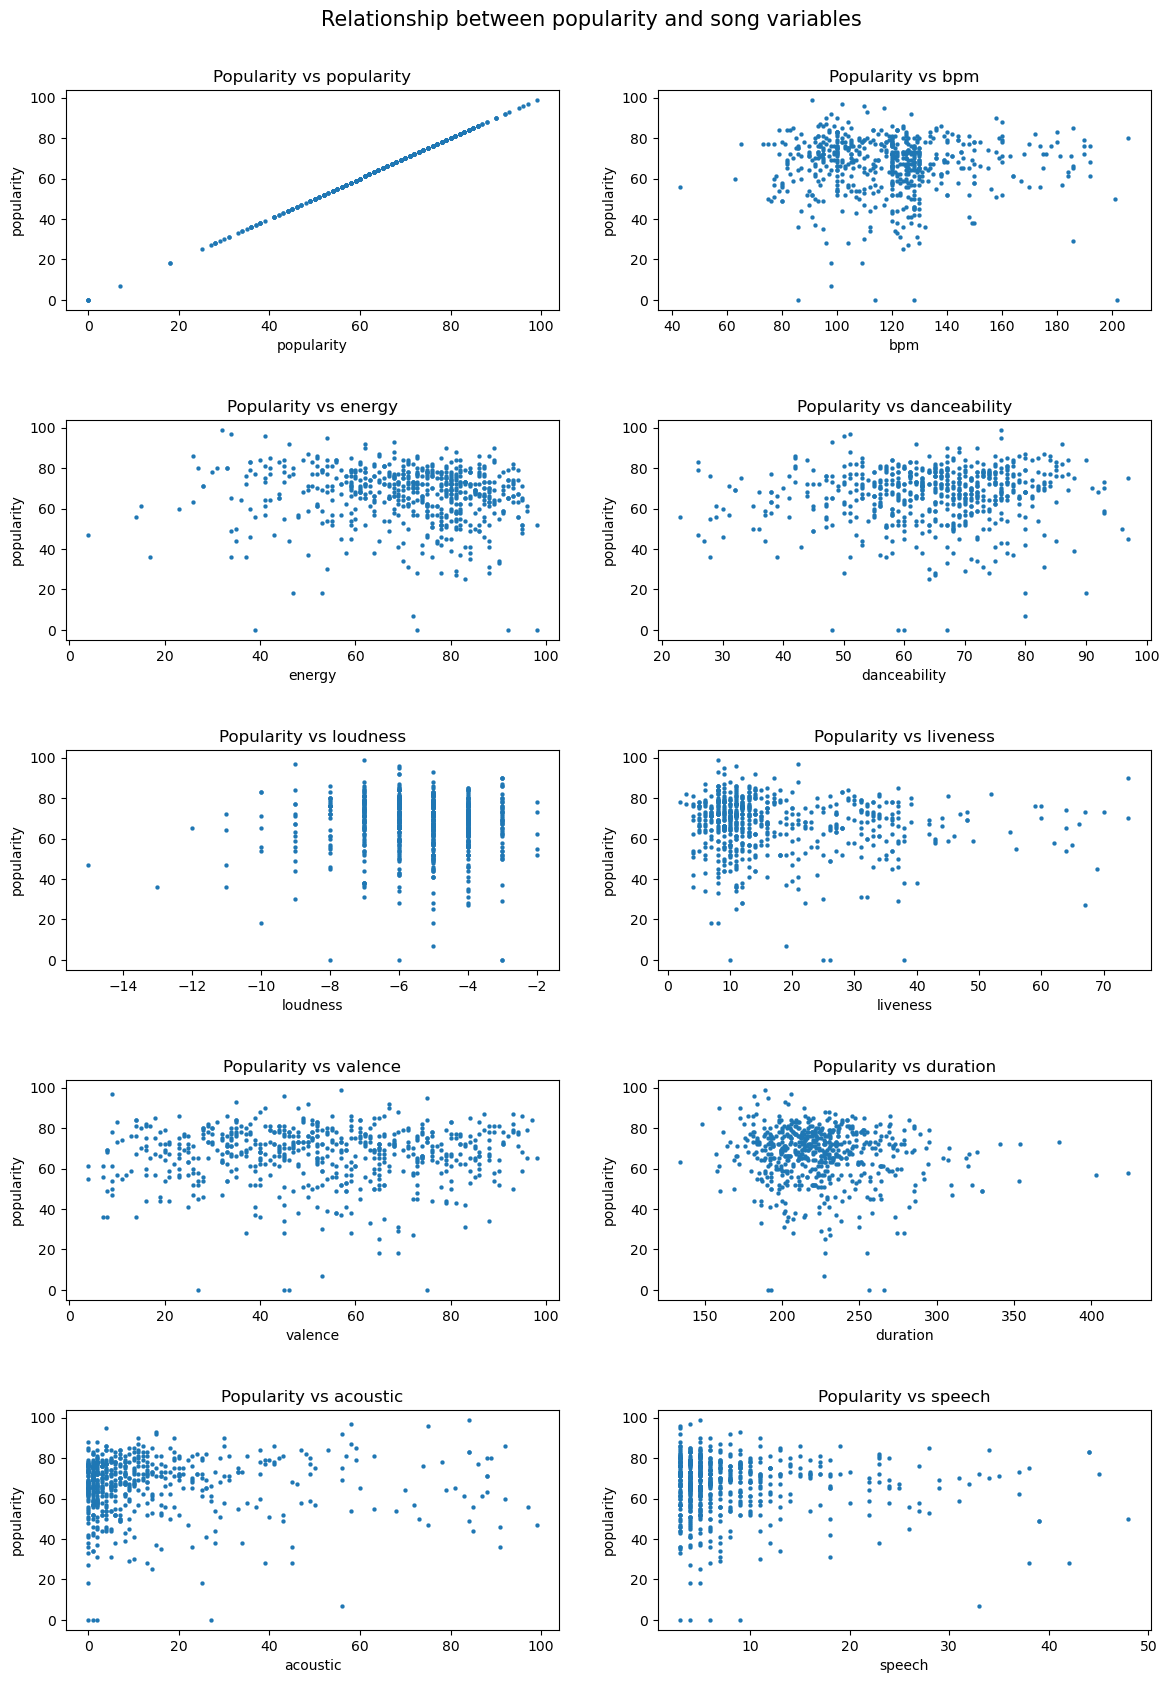

In [1195]:
#  creating figure with subplots showing relationship between song popularity and other song variables
plt.figure(figsize=figsize)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Relationship between popularity and song variables", fontsize=15, y=0.92)

for n, i in enumerate(columns): 
    ax=plt.subplot(5, 2, n+1) #  dynamically creating subplots within the for loop. See https://engineeringfordatascience.com/posts/matplotlib_subplots/
    ax.scatter(x=data[i], y=data['popularity'], marker='.', linewidths=0.1)
    ax.set_xlabel(i)
    ax.set_ylabel('popularity')
    ax.set_title('Popularity vs ' + i)

From the plots above, we cannot identify any relationships with any certainty. Let's run some more analysis to dive in further.

But first, let's deal with some **outliers** in the data that we can see from the plots above. Allowing outliers to persist in your data has the potential to skew results and statistical models, providing potentially inaccurate results and insights.

Most variables have a value of 0 with a corresponding popularity score of 0. Whilst this could be true for some songs, there are certain variables where this could not be possible. 
One variable includes 'bpm'. A song cannot have a 'bpm' of 0, as this implies there is no rhythm. There's also a loudness variable of ~-60 dB. This is unlikely given the majority of values are < -10 dB.

Let's look at the corresponding songs to see whether these values seem valid so we can best establish how to treat them. 

In [1131]:
# Or, 'An outlier of a dataset is defined as a value that is more than 3 standard deviations from the mean.' should I loop through all the data to remove statistical outliers?
# https://www.adamsmith.haus/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python

outlier = data[data['bpm'] <1]
print(outlier)

                 title artist         genre  year  bpm  energy  danceability  loudness  liveness  valence  duration  acoustic  speech  popularity  multiyear_songs
442  Million Years Ago  Adele  british soul  2016    0       0             0       -60         0        0       227         0       0           0            False


It looks as though a song by the artist Adele is causing some of these data quality concerns. All variables are 0 except for loudness (that pesky -60 dB) and duration. Upon listening to this song, there is definitely a rhthym, meaning that it should have at least a value for 'bpm'. Therefore, I will remove this row from the data as I believe it to be erroneous. 

In [1132]:
#  let's remove the song 'Million Years Ago' by Adele
data = data[data['title'] != 'Million Years Ago']

#  let's check it's been removed
print(data[data['title'] == 'Million Years Ago']) #  yep, it's gone :)

#  code for replacing outliers with the median value of that field, if required
#median_loud = data.loc[data['loudness']>-55, 'loudness'].median()
#data['loudness'] = np.where(data['loudness'] <1, median_loud, data['loudness'])
#print(data['loudness'].min()) #  checking the outlier has been removed

Empty DataFrame
Columns: [title, artist, genre, year, bpm, energy, danceability, loudness, liveness, valence, duration, acoustic, speech, popularity, multiyear_songs]
Index: []


#### Simple Linear Regression Models

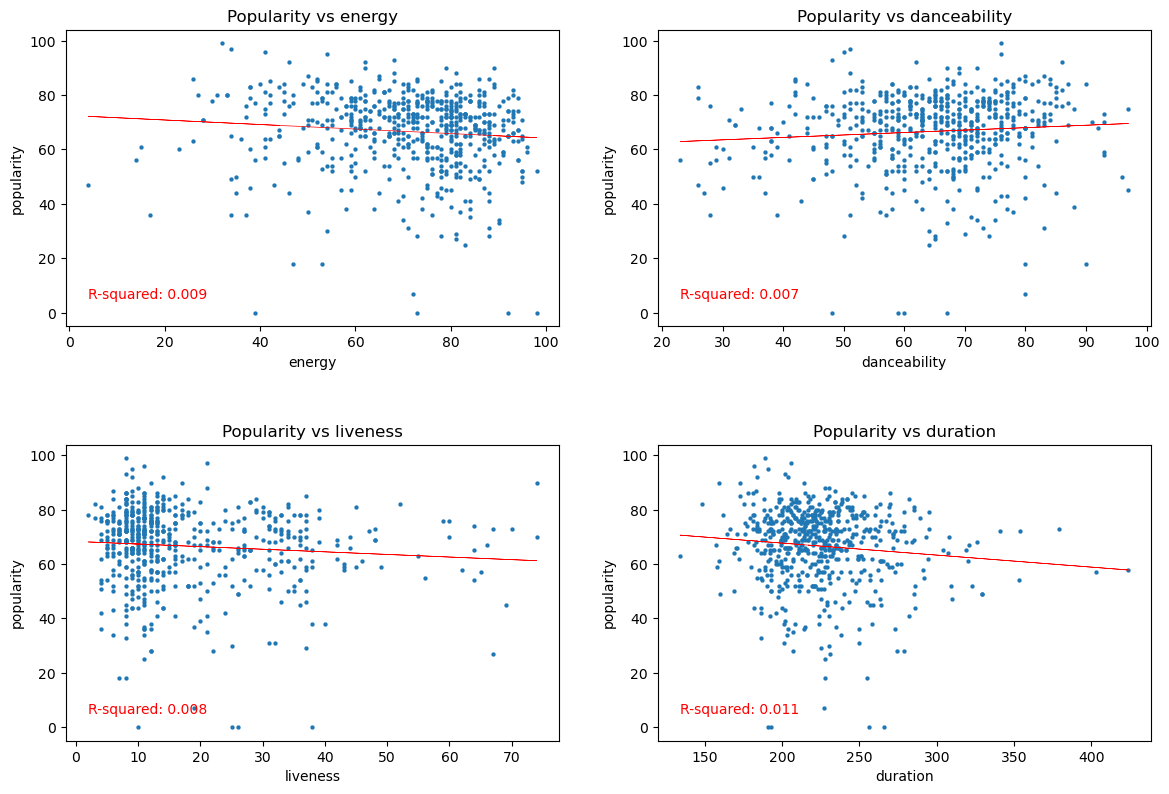

In [1184]:
#  Simple linear regression models

res = [] # initialising empty list

for i in columns:
    res.append(linregress(data[i], data['popularity'])) #  calculate regression measures for popularity as a function of each song variable (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

regression = pd.DataFrame(res, columns=['slope','intercept','rvalue','pvalue','stderr']) #  create dataframe to store results
regression['var'] = columns #  add in field noting the independent variables
regression_sig = regression[(regression['pvalue'] <= 0.05) & (regression['var'] != 'popularity')].reset_index(drop=True) #  subset dataframe which contains only significant variables (p value <= 0.05)
#print(regression_sig)

#  let's plot the significant independant variables to see what they look like
plt.figure(figsize=figsize)
plt.subplots_adjust(hspace=0.4)
#plt.suptitle("Significant variable linear regression plots", fontsize=15, y=0.95)

for n, i in enumerate(regression_sig['var'].unique()): 
    ax=plt.subplot(len(regression_sig), 2, n+1) #  dynamically creating subplots within the for loop. See https://engineeringfordatascience.com/posts/matplotlib_subplots/
    ax.scatter(x=data[i], y=data['popularity'], marker='.', linewidths=0.1)
    df = regression_sig[regression_sig['var']==i].reset_index(drop=True) #  create dataframe just containing variable for each iteration of the for loop
    slope = float(df['slope'])
    intercept = float(df['intercept'])
    r2 = float(df['rvalue']**2)
    data['slope'] = data[i] * slope + intercept #  calculating line of best fit
    ax.plot(i, 'slope', data=data, color='r', linewidth=0.5) #  plotting line of best fit
    ax.set_xlabel(i)
    ax.set_ylabel('popularity')
    ax.set_title('Popularity vs ' + i)
    ax.annotate(f"R-squared: " + str("{:.3f}".format(r2)), xy=(data[i].min(),5), color='r') #  annotating the plot with the r squared value 

From the simple linear regression models above, we can see that the **variables 'Energy', 'Danceability' 'Liveness' and 'Duration' significantly affect the popularity of a song (p value < 0.05)**, yet they **explain little of the variability (r-squared value < 0.1)**. i.e. these predictor variables still provide information about the popularity of a song, even though there is high variability in the data and data points do not fall close to the regression line.

From this, we can take away that songs with for example greater danceability are more likely to be more popular, as are shorter songs compared with longer songs. However, it is likely that a combination of factors determine how popular a song will be and will make for a more precise prediction with less variability. A multiple regression would be useful to identify which combination of factors drive song popularity.

Useful blog explaining this here: https://blog.minitab.com/en/adventures-in-statistics-2/how-to-interpret-a-regression-model-with-low-r-squared-and-low-p-values

#### Let's now look at how these significant variables have changed over time. This dataset contains 10 years' worth of data after all!

##### We can do this by assessing the distribution of variables over a decade. This could tell us about the change in composition of songs:
* Do more modern songs typically have a greater danceability score? 
* Were older songs typically shorter in duration?

We'll plot the **ECDF (Empirical Cumulative Distribution Function)** of each variable per year. 


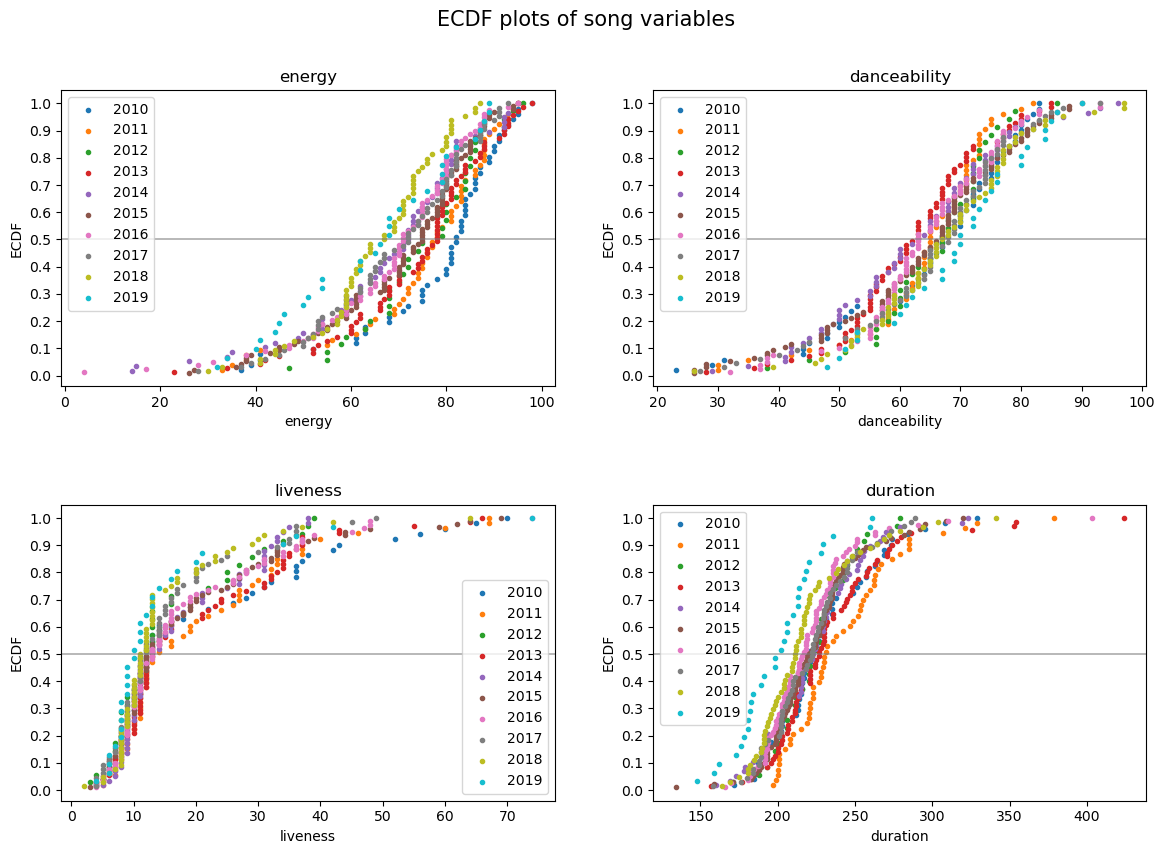

In [1227]:
plt.figure(figsize=figsize)
plt.subplots_adjust(hspace=0.4)
plt.suptitle('ECDF plots of song variables', fontsize=15, y=0.92)

#ecdf_var = ['danceability','duration','liveness','energy'] #  significant variables for this analysis

for n, var in enumerate(regression_sig['var'].unique()): 
    for year in data['year'].unique(): #  for each song variable in the list ecdf_var, plot each year's worth of data separately on the same subplot
        #print(year, var)
        ax=plt.subplot(len(ecdf_var), 2, n+1) #  dynamically creating subplots
        df = data[data['year'] == year] #  preparing dataframe
        df = df[['year',var]]
        #  ECDF
        ecdf = np.sort(df[var])
        x = np.sort(ecdf)
        y = np.arange(1,len(ecdf)+1)/len(ecdf) #  create percentages for y axis from 1% to 100%
        ax.scatter(x, y, marker='.', label=year)
        ax.set_yticks(np.arange(0, 1.01, 0.1)) #  changing y axis interval to 0.1 for easier interpretation, default is 0.2
        ax.set_xlabel(var)
        ax.set_ylabel('ECDF')
        ax.axhline(y=0.5, color='grey', linewidth=0.1) #  adding a horizontal line at y=0.5 (50% or the median value) for easier interpretation
        ax.set_title(var)
        ax.legend()    

From the ECDF plots, we can start to identify any changes in variable distribution on an annual basis. The ECDF y axis scale denotes the % of the total dataset, with 0.2 being 20%, 0.5 being 50% and so on. By cross-referencing the x axis, we can **identify the percentage of the dataset with values above or below this point**. A horizontal line at y=0.5 has been added to assist with finding the variable values for 50% of the songs per year.

* **Energy**
This plot has some notable differences between the early 2010's versus the late 2010's. The aqua and yellow lines, which represent 2019 and 2018 respectively, are shifted further to the left compared to the early years, denoted by the dark blue and orange lines, which represent 2010 and 2011 respectively. This indicates that songs from the late 2010's typically had a lower associated energy value compared with songs that are older. By comparing values at the median line, we can see that the median energy value for songs in 2018/19 was approximately 68 (or in other words, 50% of songs in the years 2018/19 had a median value of 68 or under). Comparing this for songs in 2010, 50% songs had an energy value of ~82 or less.  

* **Danceability**
The ECDFs on this plot are generally quite aligned. One noticable characteristic is that the light blue line representing 2019 is on the farthest right of the plot, suggesting that songs from this year generally have a higher danceability score. Here, 50% of songs in 2019 had a danceability score of ~70 or lower, whilst 50% of songs from mid 2010s (2013-2016, pink/purple lines) had a score of ~65 or lower.

* **Liveness**
This plot is very uniform up until ~50%, where it then deviates and patterns can be drawn out from the data. Again, the light blue and yellow lines representing 2019 and 2018 represpectively are shifted slightly left, suggesting the majority of songs from these years had lower liveness values compared with songs from earlier years. If we look at the 80% mark, 80% of songs in 2018/19 had a liveness value of ~20 or lower, whilst this max liveness value generally increased with decreasing years with a score of ~38 or lower for songs in 2010.

* **Duration**
Again, this is quite a telling plot. There are some notable differences in the ECDFs within years, with the distribution of songs from 2019 typically having shorter durations. Looking at the median line, 50% of songs in 2019 had a duration of ~200 seconds (3:20 minutes) or less, whilst 50% songs between 2010-2015 had a duration of ~225 seconds (3:45 minutes) or less. 


In [1229]:
#  That's the end of my EDA of this dataset :)

### Summary

#### There we have it. My take on some Exploratory Data Analysis on top Spotify songs from 2010 to 2019. Here we looked at:
* The **data quality**, ensuring there were no null values that could interfere with any analysis further on. We since found a song that looked to have erroneous values so we removed this from the dataset.
* Some **descriptive statistics**, focussing on the artists that had the most songs and the most common genres.
* **Summary statitics** of the dataset, showing the mean song variables of the top 10 genres and how they differ. We then moved onto looking at a correlation matrix to undestand if there were any linear relationships between song variables. 
* **Visualisations** to see if there is any relationship between the popularity score of a song and any one variable. 
* **Linear regressions** to see whether the relationships between popularity and each song variable was significant or not. We found that 4 variables were signficant ('Energy', 'Danceability' 'Liveness' and 'Duration'), although they all have low r-squared values with a lot of variability around the line of best fit. A multiple regression may be able to identify which combination of variables influence song popularity.
* Finally, we used **ECDF plots** to investigate how the distribution of these significant variables have changed throughout the years, with some noticable distribution shifts from older songs to modern songs.

##### Happy to hear any feedback, thanks :)